<a href="https://colab.research.google.com/github/artrizzo/Python/blob/main/Curso_Data_Science_Projeto_Intermedi%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Arquivos python/csgo_round_snapshots.csv')

## Estudando o Dataset

In [14]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


Aparentemente não temos colunas NaN no dataset

Temos 122.410 linhas no dataset e 94 colunas de variáveis numéricas

## Verificando se temos dados nulos

In [15]:
df_nan = pd.DataFrame(df.isna().sum()).reset_index().rename(columns = {0:'total_nan', 'index': 'coluna'})

In [16]:
df_nan

,coluna,total_nan
0,time_left,0
1,ct_score,0
2,t_score,0
3,map,0
4,bomb_planted,0
...,...,...
92,ct_grenade_molotovgrenade,0
93,t_grenade_molotovgrenade,0
94,ct_grenade_decoygrenade,0
95,t_grenade_decoygrenade,0


In [17]:
df_nan[df_nan.total_nan > 0]

,coluna,total_nan


## Estudando as variáveis categóricas

In [18]:
cols = df.dtypes.reset_index().rename(columns={'index': 'coluna', 0:'tipo'})
categ_cols = cols[cols.tipo == 'object']
cont_cols = cols[cols.tipo != 'object']
categ_cols

,coluna,tipo
3,map,object
96,round_winner,object


In [19]:
cont_cols

,coluna,tipo
0,time_left,float64
1,ct_score,float64
2,t_score,float64
4,bomb_planted,bool
5,ct_health,float64
...,...,...
91,t_grenade_incendiarygrenade,float64
92,ct_grenade_molotovgrenade,float64
93,t_grenade_molotovgrenade,float64
94,ct_grenade_decoygrenade,float64


In [20]:
cont_cols.tipo.unique()

array([dtype('float64'), dtype('bool')], dtype=object)

In [21]:
cont_cols[cont_cols.tipo == 'bool']

,coluna,tipo
4,bomb_planted,bool


In [22]:
df.bomb_planted = df.bomb_planted.astype(int)    

In [23]:
df.bomb_planted

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    0
122407    0
122408    0
122409    0
Name: bomb_planted, Length: 122410, dtype: int64

Temos 2 colunas categóricas no dataset, o mapa que estava sendo jogado, e o resultado de quem ganhou

In [24]:
df.round_winner.unique()

array(['CT', 'T'], dtype=object)

A coluna round winner mostra quem ganhou o jogo, CT representando Counter Terrorists e T representando Terrorists, que são os dois times jogados no jogo

## Verificando outliers nas variáveis contínuas

<Axes: >

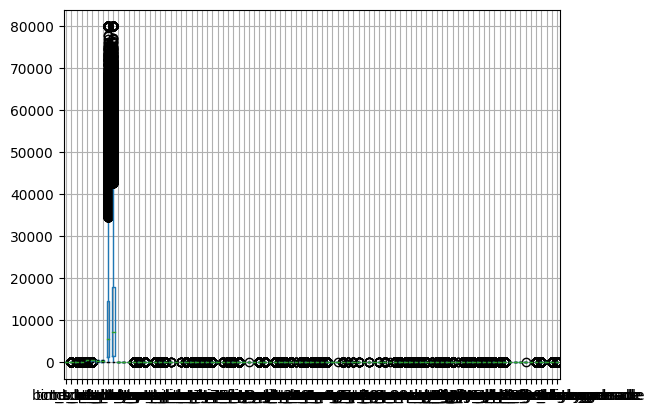

In [25]:
df.boxplot()

In [26]:
nomes_colunas = []
qtt_outliers = []

for i in cont_cols.coluna:
    
    contador = 0

    q1 = np.quantile(df[i], 0.25)
    q3 = np.quantile(df[i], 0.75)
    li = q1 - 1.5*(q3-q1)
    ls = q3 + 1.5*(q3-q1)

    for j in df.index:
        if li <= df[i][j] <= ls:
            pass 
        else:
            contador += 1
    
    perc_outliers = (contador/df[i].count())*100

    nomes_colunas.append(i)
    qtt_outliers.append(perc_outliers)
    #df = df.drop(j, axis = 0)
    


            
             
      

In [27]:
outliers = pd.DataFrame()
outliers['coluna'] = nomes_colunas
outliers['perc_outliers'] = qtt_outliers
outliers[outliers.perc_outliers > 10]

,coluna,perc_outliers
3,bomb_planted,11.178825
13,ct_players_alive,12.626419
14,t_players_alive,11.955723
15,ct_weapon_ak47,21.308717
17,ct_weapon_aug,10.071073
23,ct_weapon_cz75auto,12.320072
49,ct_weapon_mp9,10.812025
63,ct_weapon_sg553,18.546687
64,t_weapon_sg553,10.758925
72,t_weapon_deagle,23.721918


## Tratando variáveis categóricas

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in categ_cols.coluna:
    df[str(i) + '_encoded'] = le.fit_transform(df[i])
    

In [29]:
df[['round_winner', 'round_winner_encoded']]

,round_winner,round_winner_encoded
0,CT,0
1,CT,0
2,CT,0
3,CT,0
4,CT,0
...,...,...
122405,T,1
122406,T,1
122407,T,1
122408,T,1


## Como ficaram após tratamento as opções da variável Resposta

CT = 0 e T = 1

In [30]:
df = df.drop(['round_winner', 'map'], axis = 1)

## Separando o Dataset entre Treino e Teste

In [31]:
from sklearn.model_selection import train_test_split

x = df.drop('round_winner_encoded', axis = 1)
y = df.round_winner_encoded



### Padronizando as variáveis de entrada do modelo

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [33]:
x_scaled

array([[ 1.41582771, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.30640985],
       [ 1.06753073, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.30640985],
       [-0.03409385, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.30640985],
       ...,
       [ 0.31291789,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  1.28549842],
       [-0.0542903 ,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  1.28549842],
       [-0.4214985 ,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  1.28549842]])

In [34]:
x_scaled = pd.DataFrame(x_scaled, columns=(x.columns))

In [35]:
x_scaled

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,map_encoded
0,1.415828,-1.400576,-1.405702,-0.354764,0.664386,0.695301,-1.836777,-1.709542,-0.516186,-0.595345,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.306410
1,1.067531,-1.400576,-1.405702,-0.354764,0.664386,0.695301,0.502008,0.008909,-0.819351,-0.870776,...,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.306410
2,-0.034094,-1.400576,-1.405702,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,-0.883109,...,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.306410
3,-0.401302,-1.400576,-1.405702,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,-0.883109,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.306410
4,1.415277,-1.191823,-1.405702,-0.354764,0.664386,0.695301,-0.714160,-1.709542,0.763351,-0.040372,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.306410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,-1.514310,0.895711,1.496741,2.818773,-1.603312,-1.148630,-0.696619,0.346871,-0.863935,-0.435020,...,0.079077,-0.311206,-0.342864,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,1.285498
122406,1.414542,0.895711,1.704058,-0.354764,0.664386,0.695301,-1.281315,-0.707112,0.152561,1.040797,...,0.079077,-0.311206,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,1.285498
122407,0.312918,0.895711,1.704058,-0.354764,0.664386,0.695301,1.057469,1.011339,-0.765852,-0.373356,...,1.193615,0.839676,1.843956,-0.001350,-0.137694,-0.210881,2.193253,-0.163356,-0.156855,1.285498
122408,-0.054290,0.895711,1.704058,-0.354764,0.664386,0.695301,1.057469,1.011339,-0.765852,-0.373356,...,1.750884,-0.886648,0.750546,-0.687185,-0.137694,-0.210881,1.592017,-0.163356,-0.156855,1.285498


### Quebrando o Dataframe

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y , test_size=0.2, random_state=42)

## Importando o modelo

In [37]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()

modelo.fit(x_train, y_train)



y_pred = modelo.predict(x_test)


In [38]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

## Avaliando o Modelo

In [39]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


print('acurácia do modelo foi : ' + str(accuracy_score(y_test, y_pred)))
print('f1 score do modelo foi : ' + str(f1_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)

acurácia do modelo foi : 0.7498161914876236
f1 score do modelo foi : 0.7510263810414212


<Axes: >

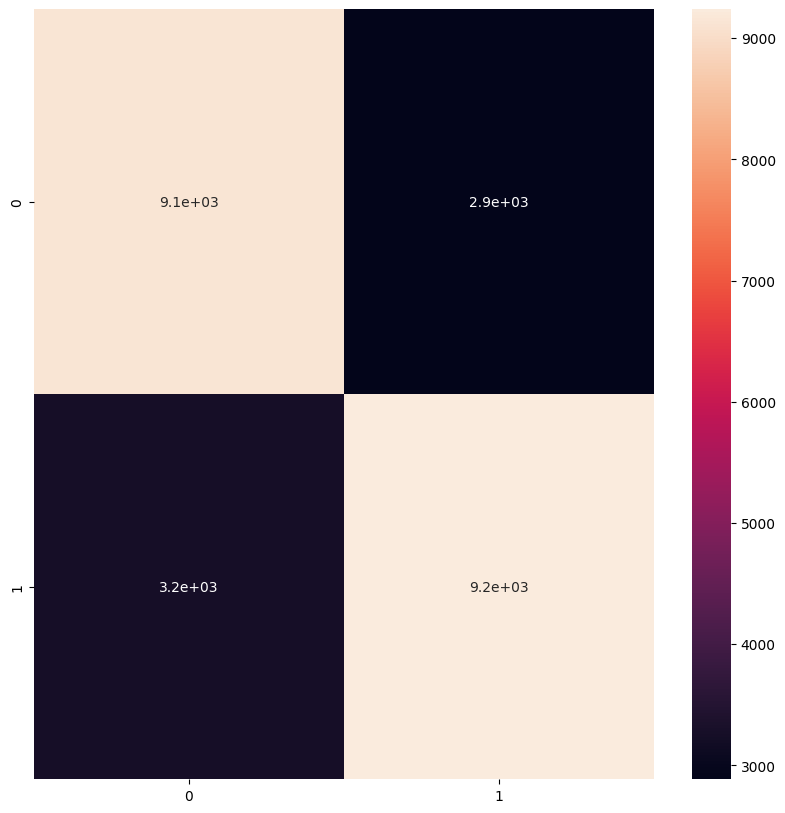

In [40]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

In [41]:
x_test.count()

time_left                    24482
ct_score                     24482
t_score                      24482
bomb_planted                 24482
ct_health                    24482
                             ...  
ct_grenade_molotovgrenade    24482
t_grenade_molotovgrenade     24482
ct_grenade_decoygrenade      24482
t_grenade_decoygrenade       24482
map_encoded                  24482
Length: 96, dtype: int64